In [8]:
# 使用KMeans进行聚类
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

# 数据加载
data = pd.read_csv('CarPrice_Assignment.csv',encoding="gbk")
#print(data)
train_x = data[["symboling","fueltype","aspiration", "doornumber","carbody","drivewheel","enginelocation","wheelbase","carlength",
                "carwidth","carheight","curbweight","enginetype","cylindernumber","enginesize","fuelsystem","boreratio","stroke",
                "compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_x["fueltype"] = le.fit_transform(train_x["fueltype"])
train_x["aspiration"] = le.fit_transform(train_x["aspiration"])
train_x["doornumber"] = le.fit_transform(train_x["doornumber"])
train_x["carbody"] = le.fit_transform(train_x["carbody"])
train_x["drivewheel"] = le.fit_transform(train_x["drivewheel"])
train_x["enginelocation"] = le.fit_transform(train_x["enginelocation"])
train_x["enginetype"] = le.fit_transform(train_x["enginetype"])
train_x["cylindernumber"] = le.fit_transform(train_x["cylindernumber"])
train_x["fuelsystem"] = le.fit_transform(train_x["fuelsystem"])

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

# 使用KMeans聚类
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)

# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)

# 将结果导出到CSV文件中
result.to_csv("result.csv",encoding="gbk")



     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

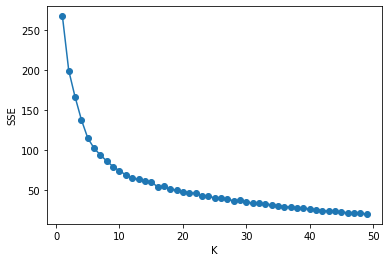

In [15]:
# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 50):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 50)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()